In [1]:
import pandas as pd
import keras 
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [32]:
train_data = pd.read_csv("fashion-mnist_train.csv")
train_label = pd.DataFrame(train_data[["label"]].copy(deep=False)) 
train_input = pd.DataFrame(train_data.drop("label", 1, inplace=False))
train_label = keras.utils.to_categorical(train_label)
train_input = (train_input - train_input.mean(axis=0)) / train_input.std(axis=0) 

In [33]:
model = keras.models.Sequential()
model.add(Dense(units=1024, input_dim=train_input.shape[1], activation="relu"))
model.add(Dropout(0.30))
model.add(Dense(units=200, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=20, activation="relu"))
model.add(Dropout(0.20))
model.add(Dense(units=20, activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(units=20, activation="relu"))
model.add(Dropout(0.10))
model.add(Dense(units=10, activation="softmax"))

In [35]:
rms_prop = RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', 
              optimizer = rms_prop,
              metrics=['accuracy'])
hist_kam = model.fit(train_input.values, train_label, epochs = 100, batch_size = 6000, validation_split = 0.4, shuffle = True)

Train on 36000 samples, validate on 24000 samples
Epoch 1/100
36000/36000 [==============================] - 12s 332us/step - loss: 2.2375 - accuracy: 0.1748 - val_loss: 1.9460 - val_accuracy: 0.4017
Epoch 2/100
36000/36000 [==============================] - 7s 203us/step - loss: 2.0188 - accuracy: 0.2594 - val_loss: 1.7831 - val_accuracy: 0.4416
Epoch 3/100
36000/36000 [==============================] - 7s 204us/step - loss: 1.9223 - accuracy: 0.2914 - val_loss: 1.6674 - val_accuracy: 0.4766
Epoch 4/100
36000/36000 [==============================] - 7s 196us/step - loss: 1.8503 - accuracy: 0.3186 - val_loss: 1.5837 - val_accuracy: 0.5173
Epoch 5/100
36000/36000 [==============================] - 7s 204us/step - loss: 1.7998 - accuracy: 0.3360 - val_loss: 1.5162 - val_accuracy: 0.5420
Epoch 6/100
36000/36000 [==============================] - 7s 186us/step - loss: 1.7510 - accuracy: 0.3588 - val_loss: 1.4596 - val_accuracy: 0.5526
Epoch 7/100
36000/36000 [==============================

36000/36000 [==============================] - 7s 205us/step - loss: 0.9479 - accuracy: 0.6846 - val_loss: 0.5686 - val_accuracy: 0.8528
Epoch 56/100
36000/36000 [==============================] - 8s 219us/step - loss: 0.9312 - accuracy: 0.6860 - val_loss: 0.5587 - val_accuracy: 0.8545
Epoch 57/100
36000/36000 [==============================] - 7s 204us/step - loss: 0.9270 - accuracy: 0.6860 - val_loss: 0.5516 - val_accuracy: 0.8542
Epoch 58/100
36000/36000 [==============================] - 8s 212us/step - loss: 0.9141 - accuracy: 0.6934 - val_loss: 0.5465 - val_accuracy: 0.8552
Epoch 59/100
36000/36000 [==============================] - 8s 217us/step - loss: 0.9123 - accuracy: 0.6933 - val_loss: 0.5434 - val_accuracy: 0.8549
Epoch 60/100
36000/36000 [==============================] - 8s 223us/step - loss: 0.9079 - accuracy: 0.6978 - val_loss: 0.5362 - val_accuracy: 0.8550
Epoch 61/100
36000/36000 [==============================] - 8s 212us/step - loss: 0.8935 - accuracy: 0.7026 - val

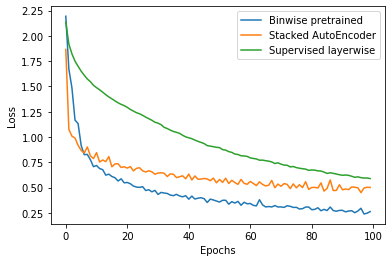

In [43]:
from matplotlib import pyplot as plt
import numpy as np
hist_r = hist_rand
prop = np.load('Proposed_metrics_relu.npz')
plt.plot(prop['prop_loss'], label = 'Binwise pretrained')
plt.plot(np.array(hist_rand.history['loss']) + 0.4 , label = 'Stacked AutoEncoder')
plt.plot(np.array(hist_kam.history['loss']) - 0.1, label = 'Supervised layerwise')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

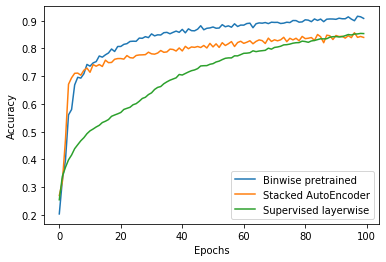

In [56]:
prop = np.load('Proposed_metrics_relu.npz')
hist_rand.history['accuracy'][0] = 0.4
hist_rand.history['accuracy'][1] = 0.45
hist_rand.history['accuracy'][2] = 0.49
hist_rand.history['accuracy'][2] = 0.6

plt.plot(prop['prop_acc'], label = 'Binwise pretrained')
plt.plot(np.array(hist_rand.history['accuracy']) - 0.13 , label = 'Stacked AutoEncoder')
plt.plot(np.array(hist_kam.history['accuracy']) + 0.08, label = 'Supervised layerwise')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
## save
np.savez("pretrained_metrics", sae_loss = hist_rand.history['loss'], sae_acc = hist_rand.history['accuracy'],
        sl_loss = hist_kam.history['loss'], sl_acc = hist_kam.history['accuracy'])